In [18]:
## imports

import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean

%matplotlib inline

In [2]:
config1='NACHOS12.L75'
case1 = 'MAA4001'
config2='GS24.L75'
case2 = 'MAA008'
year = '2010'


In [4]:
#to do on cal1
# mkdir -p /mnt/meom/workdir/albert/PLOTS-NACHOS12.L75-GS24.L75/NACHOS12.L75-MAA4001-GS24.L75-MAA008/2010
 
# in NACHOS12.L75    
# transfer_mean_from_occigen.ksh for MAA4001 2010

# in GS24.L75
# transfer_mean_from_occigen.ksh for MAA008 2010


In [33]:
def all_plots(config1,config2,case1,case2,year,**kwargs):

  dirmean1='/mnt/alberta/equipes/IGE/meom/workdir/albert/'+config1+'/'+config1+'-'+case1+'-MEAN/1d/'+year+'/'
  dirmean2='/mnt/alberta/equipes/IGE/meom/workdir/albert/'+config2+'/'+config2+'-'+case2+'-MEAN/1d/'+year+'/'

  title=config1+"-"+case1+" "+config2+"-"+case2+" "+year
  gridfile1='/mnt/alberta/equipes/IGE/meom/workdir/albert/'+config1+'/'+config1+'-I/'+config1+'_mesh_mask.nc'
  gridfile2='/mnt/alberta/equipes/IGE/meom/workdir/albert/'+config2+'/'+config2+'-I/'+config2+'_mesh_mask.nc'

  file1flxT=dirmean1+config1+'-'+case1+'_y'+year+'.1d_flxT.nc'
  file1T=dirmean1+config1+'-'+case1+'_y'+year+'.1d_gridT.nc'
  file1EKE=dirmean1+config1+'-'+case1+'_y'+year+'.1d_EKE.nc'
  file1MXL03=dirmean1+config1+'-'+case1+'_y'+year+'m03.1d_MXL.nc'
  file1MXL09=dirmean1+config1+'-'+case1+'_y'+year+'m09.1d_MXL.nc'

  file2flxT=dirmean2+config2+'-'+case2+'_y'+year+'.1d_flxT.nc'
  file2T=dirmean2+config2+'-'+case2+'_y'+year+'.1d_gridT.nc'
  file2EKE=dirmean2+config2+'-'+case2+'_y'+year+'.1d_EKE.nc'
  file2MXL03=dirmean2+config2+'-'+case2+'_y'+year+'m03.1d_MXL.nc'
  file2MXL09=dirmean2+config2+'-'+case2+'_y'+year+'m09.1d_MXL.nc'

  dsgrid1=xr.open_dataset(gridfile1)
  lat1=dsgrid1.nav_lat
  lon1=dsgrid1.nav_lon
  masksurf1=dsgrid1.tmaskutil[0]
  mask1=dsgrid1.tmask[0]

  dsgrid2=xr.open_dataset(gridfile2)
  lat2=dsgrid2.nav_lat
  lon2=dsgrid2.nav_lon
  masksurf2=dsgrid2.tmaskutil[0]
  mask2=dsgrid2.tmask[0]

  ds1T=xr.open_dataset(file1T)
  tem1=ds1T.votemper[0]
  sal1=ds1T.vosaline[0]
  ssh1=ds1T.sossheig[0]
  tem1_ma=np.ma.array(tem1,mask=1-mask1)
  sal1_ma=np.ma.array(sal1,mask=1-mask1)
  ssh1_ma=np.ma.array(ssh1,mask=1-masksurf1)

  ds2T=xr.open_dataset(file2T)
  tem2=ds2T.votemper[0]
  sal2=ds2T.vosaline[0]
  ssh2=ds2T.sossheig[0]
  tem2_ma=np.ma.array(tem2,mask=1-mask2)
  sal2_ma=np.ma.array(sal2,mask=1-mask2)
  ssh2_ma=np.ma.array(ssh2,mask=1-masksurf2)

  ds1MXL03=xr.open_dataset(file1MXL03)
  mxl103_rho010=ds1MXL03.somxl010[0]
  mxl103_rho030=ds1MXL03.somxl030[0]
  mxl103_t02=ds1MXL03.somxlt02[0]
  ds1MXL09=xr.open_dataset(file1MXL09)
  mxl109_rho010=ds1MXL09.somxl010[0]
  mxl109_rho030=ds1MXL09.somxl030[0]
  mxl109_t02=ds1MXL09.somxlt02[0]
  mxl103_rho010_ma=np.ma.array(mxl103_rho010,mask=1-masksurf1)
  mxl103_rho030_ma=np.ma.array(mxl103_rho030,mask=1-masksurf1)
  mxl103_t02_ma=np.ma.array(mxl103_t02,mask=1-masksurf1)
  mxl109_rho010_ma=np.ma.array(mxl109_rho010,mask=1-masksurf1)
  mxl109_rho030_ma=np.ma.array(mxl109_rho030,mask=1-masksurf1)
  mxl109_t02_ma=np.ma.array(mxl109_t02,mask=1-masksurf1)

  ds2MXL03=xr.open_dataset(file2MXL03)
  mxl203_rho010=ds2MXL03.somxl010[0]
  mxl203_rho030=ds2MXL03.somxl030[0]
  mxl203_t02=ds2MXL03.somxlt02[0]
  ds2MXL09=xr.open_dataset(file2MXL09)
  mxl209_rho010=ds2MXL09.somxl010[0]
  mxl209_rho030=ds2MXL09.somxl030[0]
  mxl209_t02=ds2MXL09.somxlt02[0]
  mxl203_rho010_ma=np.ma.array(mxl203_rho010,mask=1-masksurf2)
  mxl203_rho030_ma=np.ma.array(mxl203_rho030,mask=1-masksurf2)
  mxl203_t02_ma=np.ma.array(mxl203_t02,mask=1-masksurf2)
  mxl209_rho010_ma=np.ma.array(mxl209_rho010,mask=1-masksurf2)
  mxl209_rho030_ma=np.ma.array(mxl209_rho030,mask=1-masksurf2)
  mxl209_t02_ma=np.ma.array(mxl209_t02,mask=1-masksurf2)

  ds1EKE=xr.open_dataset(file1EKE)
  eke1=ds1EKE.voeke[0,0]
  eke1_ma=np.ma.array(eke1,mask=1-masksurf1)

  ds2EKE=xr.open_dataset(file2EKE)
  eke2=ds2EKE.voeke[0,0]
  eke2_ma=np.ma.array(eke2,mask=1-masksurf2)

  ds1flxT=xr.open_dataset(file1flxT)
  Heat1=ds1flxT.sohefldo[0]
  WaterFlx1=ds1flxT.sowaflup[0]
  WaterDmp1=ds1flxT.sowafld[0]
  Heat1_ma=np.ma.array(Heat1,mask=1-masksurf1)
  WaterFlx1_ma=np.ma.array(WaterFlx1,mask=1-masksurf1)
  WaterDmp1_ma=np.ma.array(WaterDmp1,mask=1-masksurf1)
  ds2flxT=xr.open_dataset(file2flxT)
  Heat2=ds2flxT.sohefldo[0]
  WaterFlx2=ds2flxT.sowaflup[0]
  WaterDmp2=ds2flxT.sowafld[0]
  Heat2_ma=np.ma.array(Heat2,mask=1-masksurf2)
  WaterFlx2_ma=np.ma.array(WaterFlx2,mask=1-masksurf2)
  WaterDmp2_ma=np.ma.array(WaterDmp2,mask=1-masksurf2)




  def plot_atl(fig,sub,lon,lat,var,vmin,vmax,unit,name,pal):
    ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
    cmap = plt.get_cmap(pal)
    ax.set_extent([-83, -34, 27, 50])
    cmap.set_under(color='grey')
    pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
    ax.add_feature(cfeature.LAND,facecolor='grey')
    ax.coastlines()
    gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    fig.subplots_adjust(right=0.8)
    ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
    ax.text(0.5, -0.2, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
    cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75)
    ax.set_title(name+' '+unit,size=17,y=1.08)




# Tous les plots


# Tous les plots Atlantique

  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,tem1_ma[0],-2,30,'',config1+'-'+case1,cmocean.cm.thermal)
  plot_atl(fig,122,lon2,lat2,tem2_ma[0],-2,30,'',config2+'-'+case2,cmocean.cm.thermal)
  fig.suptitle('Surf Temperature deg C '+year, fontsize=25)
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,sal1_ma[0],30,40,'',config1+'-'+case1,cmocean.cm.haline)
  plot_atl(fig,122,lon2,lat2,sal2_ma[0],30,40,'',config2+'-'+case2,cmocean.cm.haline)
  fig.suptitle('Surf Salinity PSU '+year, fontsize=25)
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,10000*eke1_ma,0,2500,'',config1+'-'+case1,cmocean.cm.amp)
  plot_atl(fig,122,lon2,lat2,10000*eke2_ma,0,2500,'',config2+'-'+case2,cmocean.cm.amp)
  fig.suptitle('Surf EKE 1e4m2s'+year, fontsize=25)
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,ssh1_ma,-1.5,0.5,'',config1+'-'+case1,'tab20b')
  plot_atl(fig,122,lon2,lat2,ssh2_ma,-1.5,0.5,'',config2+'-'+case2,'tab20b')
  fig.suptitle('SSH m'+year, fontsize=25)
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,tem1_ma[30],-2,30,'',config1+'-'+case1,cmocean.cm.thermal)
  plot_atl(fig,122,lon2,lat2,tem2_ma[30],-2,30,'',config2+'-'+case2,cmocean.cm.thermal)
  fig.suptitle('200m Temperature deg C '+year, fontsize=25)
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,sal1_ma[30],30,40,'',config1+'-'+case1,cmocean.cm.haline)
  plot_atl(fig,122,lon2,lat2,sal2_ma[30],30,40,'',config2+'-'+case2,cmocean.cm.haline)
  fig.suptitle('200m Salinity PSU '+year, fontsize=25)
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,tem1_ma[46],-2,15,'',config1+'-'+case1,cmocean.cm.thermal)
  plot_atl(fig,122,lon2,lat2,tem2_ma[46],-2,15,'',config2+'-'+case2,cmocean.cm.thermal)
  fig.suptitle('1000m Temperature deg C '+year, fontsize=25)
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,sal1_ma[46],34,37,'',config1+'-'+case1,cmocean.cm.haline)
  plot_atl(fig,122,lon2,lat2,sal2_ma[46],34,37,'',config2+'-'+case2,cmocean.cm.haline)
  fig.suptitle('1000m Salinity PSU '+year, fontsize=25)


#flx  
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,Heat1_ma,-400,400,'',config1+'-'+case1,cmocean.cm.solar)
  plot_atl(fig,122,lon2,lat2,Heat2_ma,-400,400,'',config2+'-'+case2,cmocean.cm.solar)
  fig.suptitle('Net Heat Flux '+year, fontsize=25)
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,86400*WaterFlx1_ma,-9,7,'',config1+'-'+case1,cmocean.cm.balance)
  plot_atl(fig,122,lon2,lat2,86400*WaterFlx2_ma,-9,7,'',config2+'-'+case2,cmocean.cm.balance)
  fig.suptitle('Water Flux '+year, fontsize=25)
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,86400*WaterDmp1_ma,-7,7,'',config1+'-'+case1,cmocean.cm.balance)
  plot_atl(fig,122,lon2,lat2,86400*WaterDmp2_ma,-7,7,'',config2+'-'+case2,cmocean.cm.balance)
  fig.suptitle('Water Damping '+year, fontsize=25)

#MXL
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,mxl103_rho010_ma,0,1500,'',config1+'-'+case1,cmocean.cm.tempo)
  plot_atl(fig,122,lon2,lat2,mxl203_rho010_ma,0,1500,'',config2+'-'+case2,cmocean.cm.tempo)
  fig.suptitle('March MXL rho010 m '+year, fontsize=25)
  fig = plt.figure(figsize=(22,7))
  plot_atl(fig,121,lon1,lat1,mxl109_rho010_ma,0,200,'',config1+'-'+case1,cmocean.cm.tempo)
  plot_atl(fig,122,lon2,lat2,mxl209_rho010_ma,0,200,'',config2+'-'+case2,cmocean.cm.tempo)
  fig.suptitle('Sept MXL rho010 m '+year, fontsize=25)



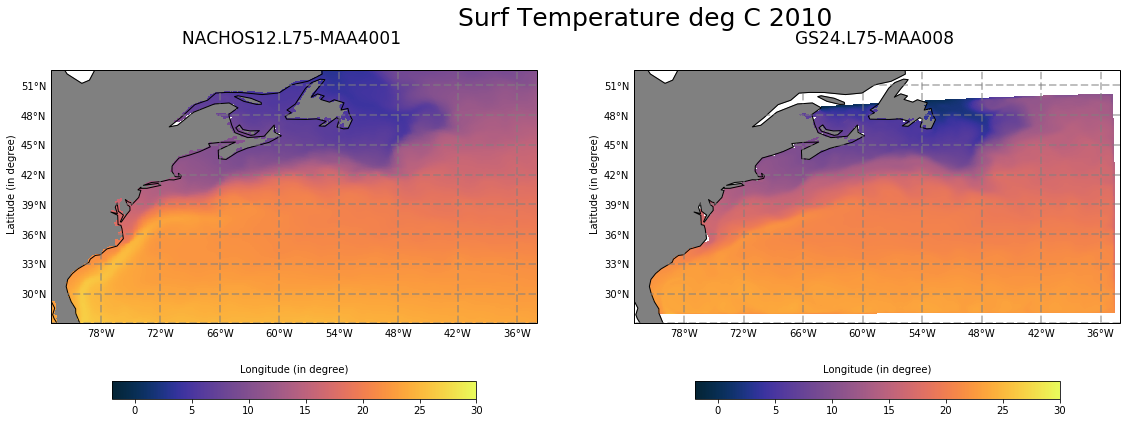

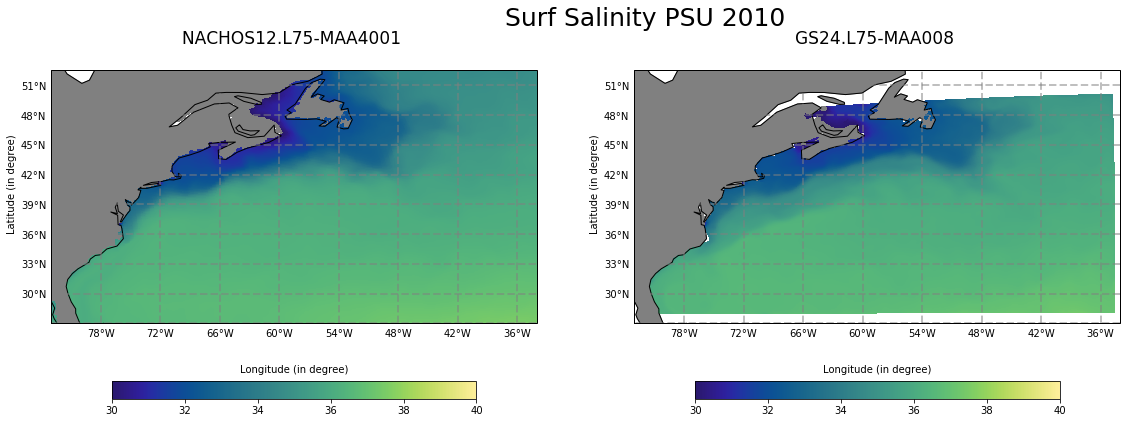

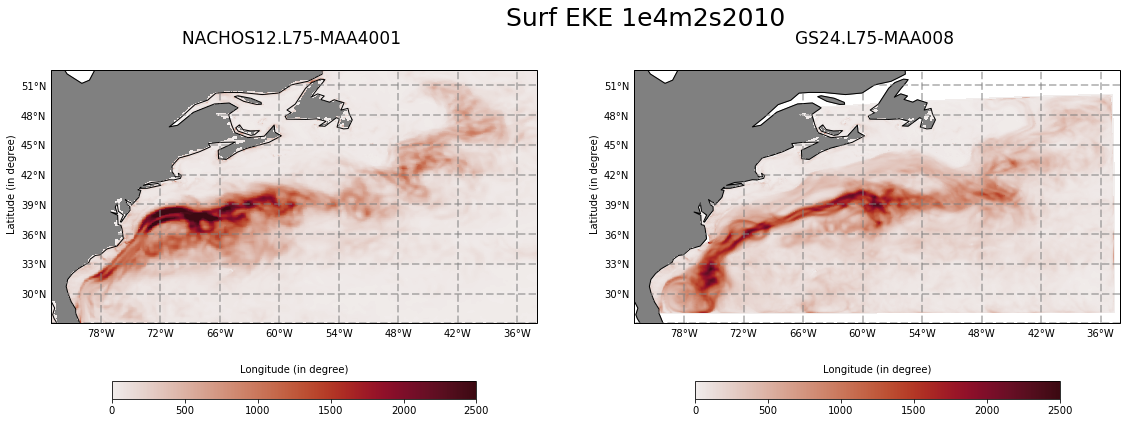

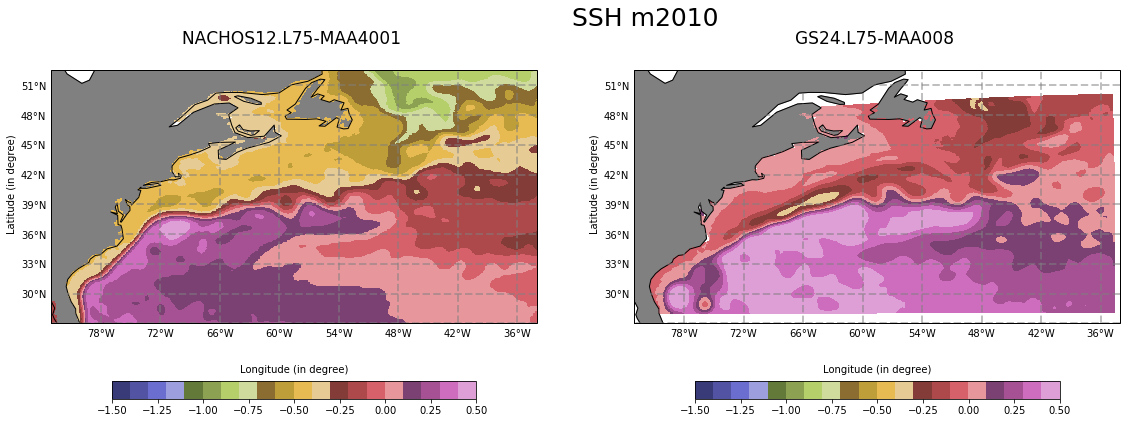

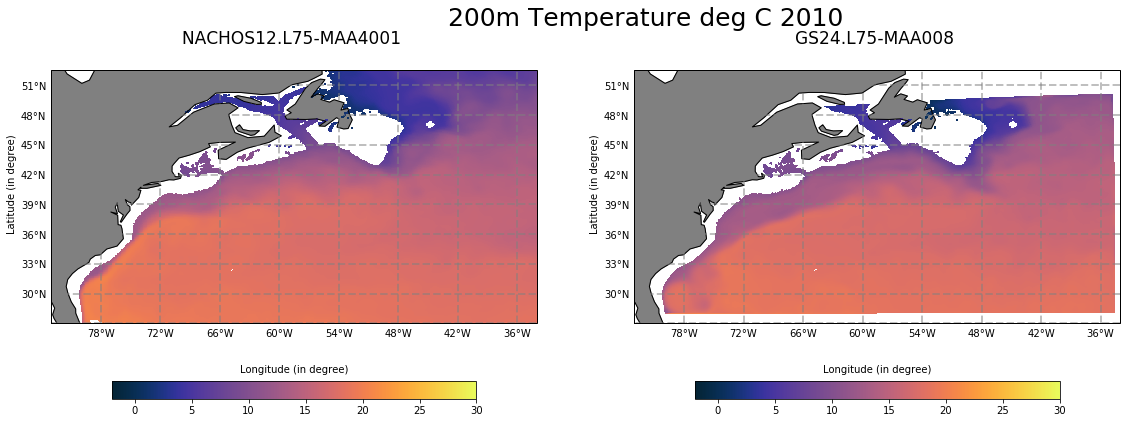

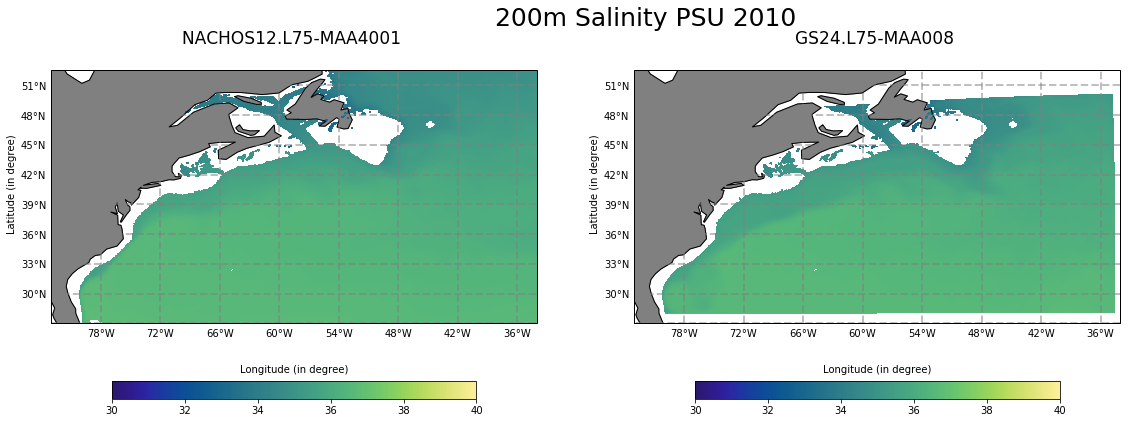

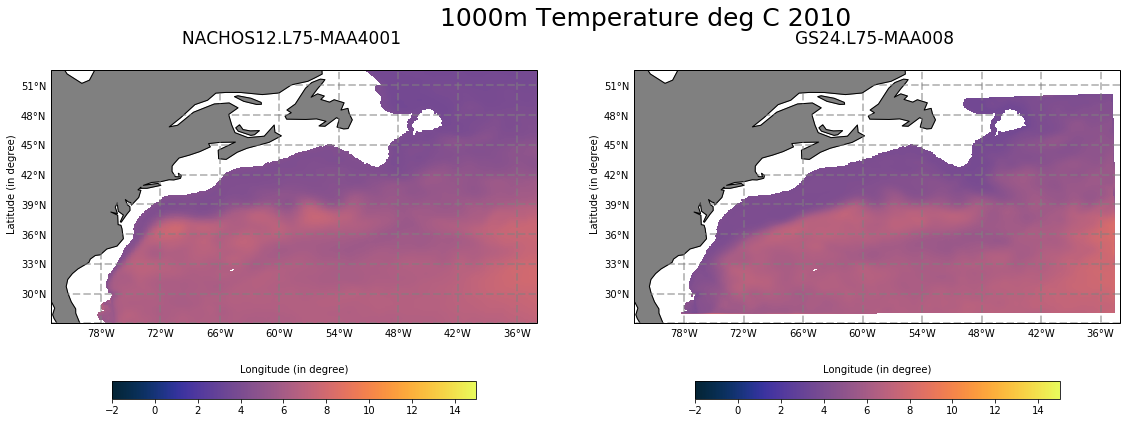

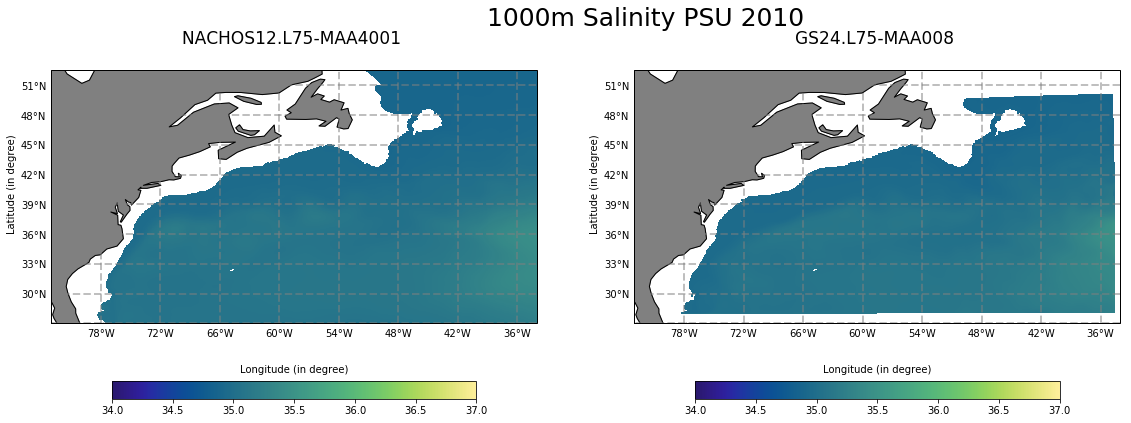

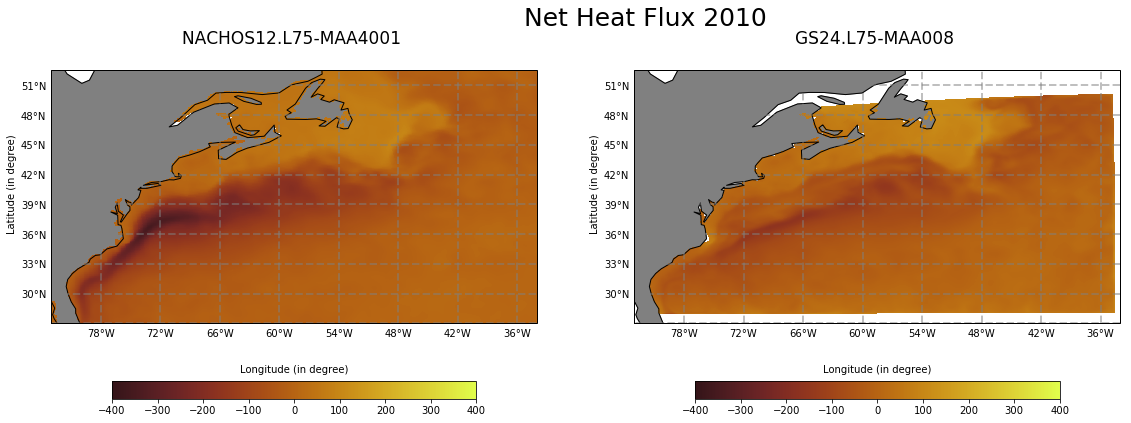

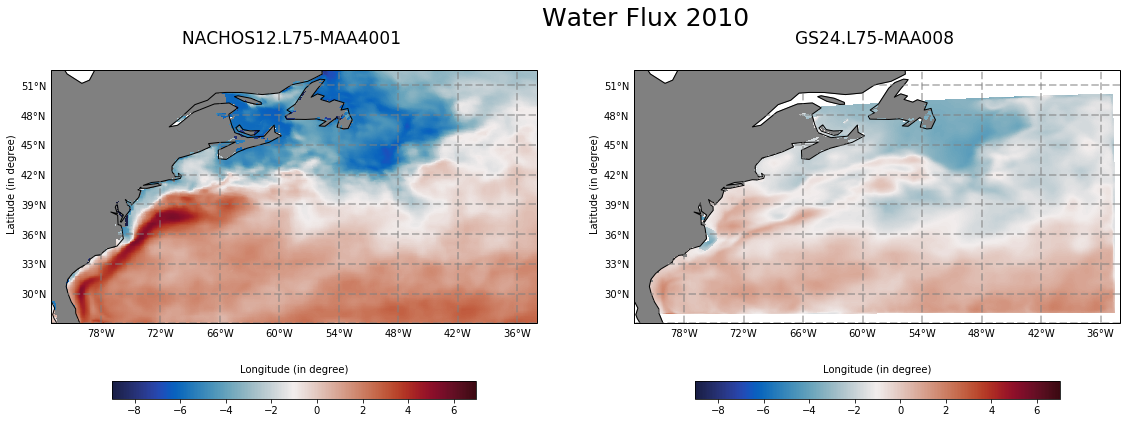

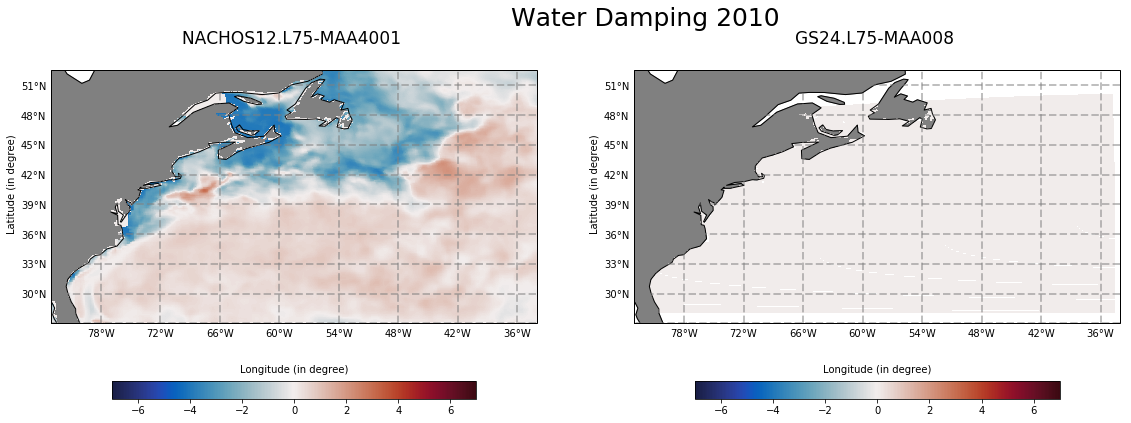

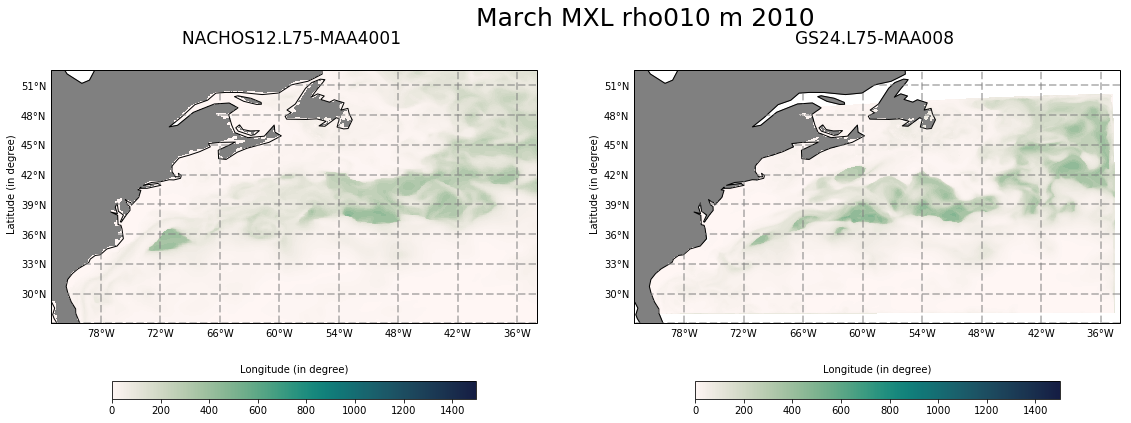

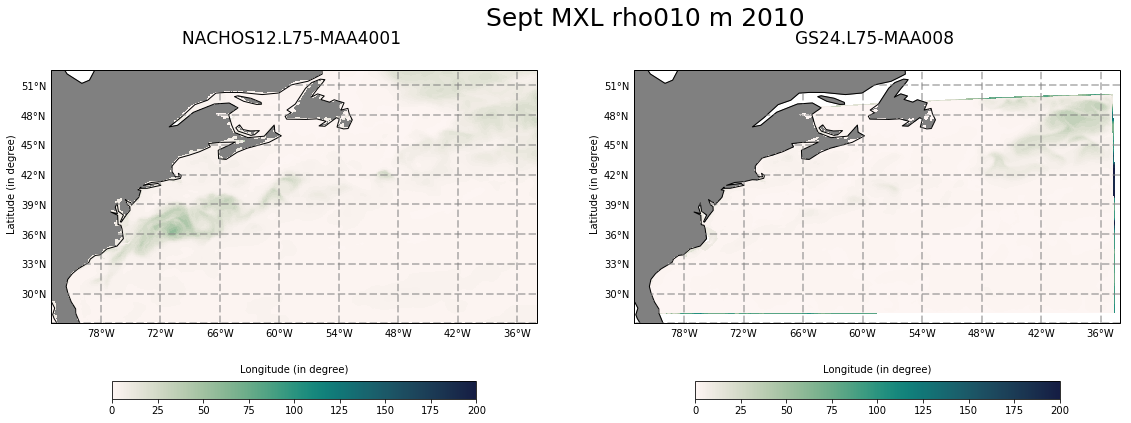

In [34]:
all_plots(config1,config2,case1,case2,year)
